In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [8]:
df = pd.read_csv(r"D:\UNH Materials\ml-zoomcamp-2024\3. Classification\bank+marketing\bank\bank-full.csv", delimiter=";")

In [17]:
# filter dataframe columns
df = df[df.columns[~df.columns.isin(['default','loan'])]]

In [18]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
# check missing values

df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Q1 
###  What is the most frequent observation (mode) for the column education?

In [22]:
df['education'].value_counts()

# Secondary

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

# Q2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

### What are the two features that have the biggest correlation?

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [36]:
corr_df = df.select_dtypes(include='int64')

In [51]:
corr_df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


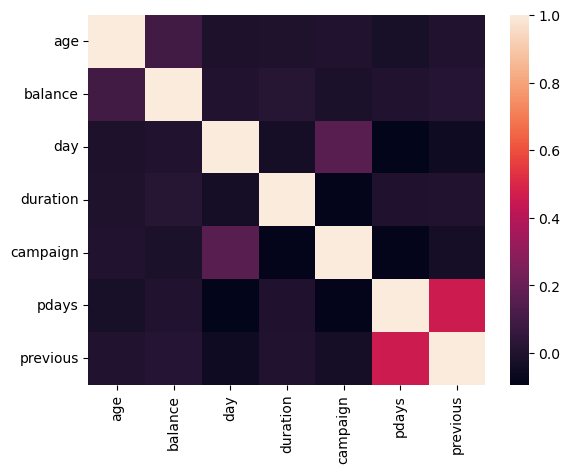

In [45]:
sns.heatmap(corr_df.corr())
plt.show()

pday vs previous

# Q3

<b>Target encoding</b>
- Now we want to encode the y variable.
- Let's replace the values yes/no with 1/0. <br>

<b>Split the data</b>
- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value y is not in your dataframe.
<br>
- ### Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
- ### Round the scores to 2 decimals using round(score, 2).

In [57]:
df.replace({'no':0, 'yes': 1}, inplace=True)

C:\Users\Sahil\AppData\Local\Temp\ipykernel_20400\2511654560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'no':0, 'yes': 1}, inplace=True)


In [58]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,1,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,1,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,1,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,0,telephone,17,nov,508,4,-1,0,unknown,0


In [65]:
train_full, test_df = train_test_split(df, test_size=0.2, random_state = 42)

In [75]:
train_df, val_df = train_test_split(train_full, test_size=0.25, random_state = 42)

In [76]:
y_train = train_df.y.values
y_val = val_df.y.values

del train_df['y']
del val_df['y']

In [77]:
def calculate_mi(series):
    return mutual_info_score(series, y_train)

In [79]:
cat_df = train_df.select_dtypes(include='object')

In [80]:
df_mi = cat_df.apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [187]:
display(df_mi.round(2))

,MI
poutcome,0.03
month,0.03
contact,0.01
job,0.01
education,0.00
marital,0.00


# Q4

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

<b>What accuracy did you get?

In [165]:
# One hot encoding
cat_cols = cat_df.columns.tolist()
train_dict = train_df.to_dict(orient='records')
val_dict = val_df.to_dict(orient='records')

In [166]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_val = dv.fit_transform(val_dict)

In [167]:
X_train.shape

(27126, 46)

In [168]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing', 'job=admin.', 'job=blue-collar',
       'job=entrepreneur', 'job=housemaid', 'job=management',
       'job=retired', 'job=self-employed', 'job=services', 'job=student',
       'job=technician', 'job=unemployed', 'job=unknown',
       'marital=divorced', 'marital=married', 'marital=single',
       'month=apr', 'month=aug', 'month=dec', 'month=feb', 'month=jan',
       'month=jul', 'month=jun', 'month=mar', 'month=may', 'month=nov',
       'month=oct', 'month=sep', 'pdays', 'poutcome=failure',
       'poutcome=other', 'poutcome=success', 'poutcome=unknown',
       'previous'], dtype=object)

In [169]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [170]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [172]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred = y_pred > 0.5
original_acc = round((y_val == y_pred).mean(), 2)
original_acc

0.9

# Q5

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

<b>Which of following feature has the smallest difference?

In [140]:
model.coef_[0].round(3)

array([-3.000e-03,  0.000e+00, -7.900e-02,  2.650e-01,  7.900e-02,
       -1.285e+00,  7.000e-03,  4.000e-03, -4.290e-01, -2.400e-01,
       -6.600e-02, -2.050e-01, -7.390e-01,  6.800e-02, -2.240e-01,
       -2.630e-01, -2.980e-01, -8.700e-02,  3.450e-01, -3.020e-01,
       -1.570e-01,  2.530e-01, -1.480e-01,  9.000e-03, -1.380e-01,
       -3.030e-01, -4.680e-01, -1.700e-01,  4.200e-02, -7.190e-01,
        3.320e-01, -3.510e-01, -1.027e+00, -1.002e+00,  3.110e-01,
        1.354e+00, -4.820e-01, -9.790e-01,  8.110e-01,  7.690e-01,
       -1.000e-03, -7.630e-01, -5.890e-01,  1.528e+00, -1.116e+00,
        5.000e-03])

In [141]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'age': -0.003,
 'balance': 0.0,
 'campaign': -0.079,
 'contact=cellular': 0.265,
 'contact=telephone': 0.079,
 'contact=unknown': -1.285,
 'day': 0.007,
 'duration': 0.004,
 'education=primary': -0.429,
 'education=secondary': -0.24,
 'education=tertiary': -0.066,
 'education=unknown': -0.205,
 'housing': -0.739,
 'job=admin.': 0.068,
 'job=blue-collar': -0.224,
 'job=entrepreneur': -0.263,
 'job=housemaid': -0.298,
 'job=management': -0.087,
 'job=retired': 0.345,
 'job=self-employed': -0.302,
 'job=services': -0.157,
 'job=student': 0.253,
 'job=technician': -0.148,
 'job=unemployed': 0.009,
 'job=unknown': -0.138,
 'marital=divorced': -0.303,
 'marital=married': -0.468,
 'marital=single': -0.17,
 'month=apr': 0.042,
 'month=aug': -0.719,
 'month=dec': 0.332,
 'month=feb': -0.351,
 'month=jan': -1.027,
 'month=jul': -1.002,
 'month=jun': 0.311,
 'month=mar': 1.354,
 'month=may': -0.482,
 'month=nov': -0.979,
 'month=oct': 0.811,
 'month=sep': 0.769,
 'pdays': -0.001,
 'poutcome=fail

In [175]:
# All Features
features = ['age', 'balance', 'marital', 'previous']
train_df[features].iloc[:10].to_dict(orient='records')
dicts_train_small = train_df[features].to_dict(orient='records')
dicts_val_small = val_df[features].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
X_train_small = dv_small.fit_transform(dicts_train_small)
X_val_small = dv_small.fit_transform(dicts_val_small)
dv_small.get_feature_names_out()
model_small = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_small.fit(X_train_small, y_train)
model_small.intercept_[0]
w = model_small.coef_[0]
w.round(3)
y_pred = model_small.predict_proba(X_val_small)[:, 1]
y_pred = y_pred > 0.5
round(original_acc - (y_val == y_pred).mean(), 3)

0.02

In [176]:
# All Features without previous
features = ['age', 'balance', 'marital']
train_df[features].iloc[:10].to_dict(orient='records')
dicts_train_small = train_df[features].to_dict(orient='records')
dicts_val_small = val_df[features].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
X_train_small = dv_small.fit_transform(dicts_train_small)
X_val_small = dv_small.fit_transform(dicts_val_small)
dv_small.get_feature_names_out()
model_small = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_small.fit(X_train_small, y_train)
model_small.intercept_[0]
w = model_small.coef_[0]
w.round(3)
y_pred = model_small.predict_proba(X_val_small)[:, 1]
y_pred = y_pred > 0.5
round(original_acc - (y_val == y_pred).mean(), 3)

0.018

In [177]:
# All Features without marital
features = ['age', 'balance', 'previous']
train_df[features].iloc[:10].to_dict(orient='records')
dicts_train_small = train_df[features].to_dict(orient='records')
dicts_val_small = val_df[features].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
X_train_small = dv_small.fit_transform(dicts_train_small)
X_val_small = dv_small.fit_transform(dicts_val_small)
dv_small.get_feature_names_out()
model_small = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_small.fit(X_train_small, y_train)
model_small.intercept_[0]
w = model_small.coef_[0]
w.round(3)
y_pred = model_small.predict_proba(X_val_small)[:, 1]
y_pred = y_pred > 0.5
round(original_acc - (y_val == y_pred).mean(), 3)

0.02

In [179]:
# All Features without balance
features = ['age', 'marital', 'previous']
train_df[features].iloc[:10].to_dict(orient='records')
dicts_train_small = train_df[features].to_dict(orient='records')
dicts_val_small = val_df[features].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
X_train_small = dv_small.fit_transform(dicts_train_small)
X_val_small = dv_small.fit_transform(dicts_val_small)
dv_small.get_feature_names_out()
model_small = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_small.fit(X_train_small, y_train)
model_small.intercept_[0]
w = model_small.coef_[0]
w.round(3)
y_pred = model_small.predict_proba(X_val_small)[:, 1]
y_pred = y_pred > 0.5
round(original_acc - (y_val == y_pred).mean(), 3)

0.02

In [180]:
# All Features without aga
features = ['balance', 'marital', 'previous']
train_df[features].iloc[:10].to_dict(orient='records')
dicts_train_small = train_df[features].to_dict(orient='records')
dicts_val_small = val_df[features].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
X_train_small = dv_small.fit_transform(dicts_train_small)
X_val_small = dv_small.fit_transform(dicts_val_small)
dv_small.get_feature_names_out()
model_small = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_small.fit(X_train_small, y_train)
model_small.intercept_[0]
w = model_small.coef_[0]
w.round(3)
y_pred = model_small.predict_proba(X_val_small)[:, 1]
y_pred = y_pred > 0.5
round(original_acc - (y_val == y_pred).mean(), 3)

0.02

# Q4

- Now let's train a regularized logistic regression.
- Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

<b>Which of these C leads to the best accuracy on the validation set?

In [186]:
C = [0.01, 0.1, 1, 10, 100]
train_dict = train_df.to_dict(orient='records')
val_dict = val_df.to_dict(orient='records')
for c in C:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    y_pred = y_pred > 0.5
    original_acc = round((y_val == y_pred).mean(), 3)
    print('for c = {}, accuracy is {}'.format(c, original_acc))

for c = 0.01, accuracy is 0.898
for c = 0.1, accuracy is 0.899
for c = 1, accuracy is 0.902
for c = 10, accuracy is 0.901
for c = 100, accuracy is 0.9


In [181]:
c = 1

In [184]:
print('for c = {}, accuracy is {}'.format(c, original_acc))

for c = 1, original_acc


In [178]:
# Removing age
